## Task: Predict the outcome of a football match, based on historical match and player data.

You are provided with football matches dataset. This dataset includes historical match outcomes, player statistics, and other relevant factors. Your objective is to develop a multiclass classification model that accurately predicts the result of a football match: "home win", "away win", or "draw".

Your target is the column: "Score".

You are provided with the code to download and load the csv file.

Your work will be evaluated based on the completion of the following tasks:

Tasks:
> *  EDA & Preprocessing: You should check the following points and ADD COMMENTS about your findings:
>   
>    1- Imbalance.
>    
>    2- Missing values.
>    
>    3- Duplicates.
>    
>    4- Categorical values.
> * Baseline: Create a majority class baseline.
> * Build a ML model: Train and evaluate using K-Fold (K=5) without shuffling, and with F1 Score as the metric.
> * Plot the features importance of your model.
> * Performance: Achieve F1 Score ≥ 0.5
> * (Bonus): Use "VotingClassifier" from sklearn with parameter voting="soft" to combine more than one model together then print the score (Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

Note: You are allowed to use any models or libraries you want.

In [1]:
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.base import clone
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
my_url = "https://drive.google.com/file/d/1kxeMw56UNopFfDPcFlAg9RMluskY7-HF/view?usp=sharing"
file_id = my_url.split('/')[-2]
file_id

'1kxeMw56UNopFfDPcFlAg9RMluskY7-HF'

In [3]:
download_url = f'https://drive.google.com/uc?id={file_id}'
output = 'downloaded_file.csv'
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1kxeMw56UNopFfDPcFlAg9RMluskY7-HF
To: c:\KAUST Academy\Stage-2\coding_exam\downloaded_file.csv
100%|██████████| 122k/122k [00:00<00:00, 468kB/s]


'downloaded_file.csv'

In [4]:
df = pd.read_csv('downloaded_file.csv')

# Exploratory Data Analysis (EDA):

##### 1- Check class imbalanced. If exist, We use appropriate metric: Precision, Recall, F1, AUC and use StraitifiedKFold split.
##### 2- Check missing values.
##### 3- Check catogerical features. If exist, use appropriate feature encoding.
##### 4- Check duplicates values. If exist, simple drop duplicates.
##### 5- check scales in the data. If there a big differences, standardize them

In [5]:
df.head()

,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,AccurPerHalf1Away,AccurPerHalf2Away,InaccurPerHalf1Away,InaccurPerHalf2Away,AccurPassesPerHalf1Away,AccurPassesPerHalf2Away,ShotsHalf1_diff,ShotsHalf2_diff,SoTHalf1_diff,SoTHalf2_diff
0,1,Antennae,Andromeda,Away win,2,2017,46,8.0,2.0,340.0,...,271.0,162.0,43.0,32.0,0.8633,0.8350,1.0,2.0,0.0,1.0
1,1,Andromeda,Antennae,Draw,9,2016,258,5.0,1.0,443.0,...,174.0,212.0,31.0,45.0,0.8486,0.8247,0.0,-5.0,0.0,1.0
2,1,Andromeda,Butterfly,Away win,12,2016,347,3.0,0.0,669.0,...,185.0,94.0,60.0,49.0,0.7550,0.6570,0.0,-3.0,-1.0,-1.0
3,1,Andromeda,Cigar,Away win,1,2017,25,5.0,2.0,384.0,...,174.0,179.0,46.0,47.0,0.7910,0.7920,-2.0,-4.0,-1.0,0.0
4,1,Andromeda,Circinus,Home Win,8,2016,237,13.0,2.0,542.0,...,237.0,215.0,55.0,59.0,0.8115,0.7847,4.0,4.0,0.0,2.0


In [6]:
df.columns

Index(['Season', 'Home Team', 'Away Team', 'Score', 'Month', 'Year',
       'WeekOfYear', 'TotalShotsPerHomeTeam', 'TotalSoTPerHomeTeam',
       'TotalPassesPerHomeTeam', 'TotalAccurPerHomeTeam',
       'TotalInaccurPerHomeTeam', 'TotalShotsPerAwayTeam',
       'TotalSoTPerAwayTeam', 'TotalPassesPerAwayTeam',
       'TotalAccurPerAwayTeam', 'TotalInaccurPerAwayTeam',
       'ShotsHomeAway_diff', 'SoTHomeAway_diff', 'TotalShotsPerMatch',
       'TotalSoTPerMatch', 'TotalPassesPerMatch', 'TotalAccurPerMatch',
       'TotalInaccurPerMatch', 'AccurPassesHome', 'AccurPassesAway',
       'AccurPassesMatch', 'ShotsPerHalf1Home', 'ShotsPerHalf2Home',
       'SoTPerHalf1Home', 'SoTPerHalf2Home', 'PassesPerHalf1Home',
       'PassesPerHalf2Home', 'AccurPerHalf1Home', 'AccurPerHalf2Home',
       'InaccurPerHalf1Home', 'InaccurPerHalf2Home', 'AccurPassesPerHalf1Home',
       'AccurPassesPerHalf2Home', 'ShotsPerHalf1Away', 'ShotsPerHalf2Away',
       'SoTPerHalf1Away', 'SoTPerHalf2Away', 'PassesPer

Target Distribution:
Score
Home Win    0.398058
Draw        0.327670
Away win    0.274272
Name: proportion, dtype: float64


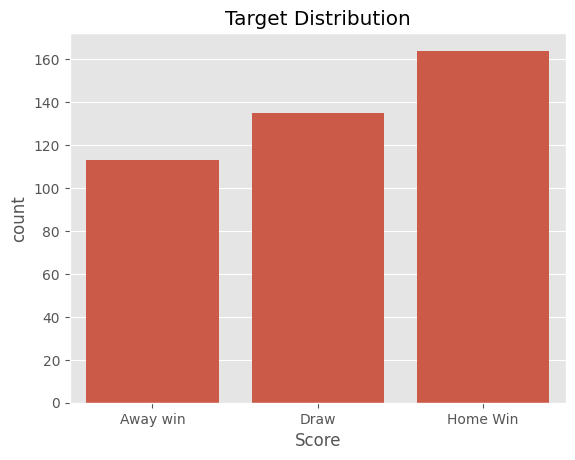

In [7]:
# use ggplot sytle
plt.style.use('ggplot')
# Check class imbalance
def check_class_imbalance(df, target_column):
    print("Target Distribution:")
    print(df[target_column].value_counts(normalize=True))
    sns.countplot(x=df[target_column])
    plt.title("Target Distribution")
    plt.show()

check_class_imbalance(df, "Score")

In [8]:
# Check missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing Values per Column:")
    print(missing_values[missing_values > 0])
    if missing_values.any():
        print("\nDrop Missing Values as needed.")
        df.dropna(inplace=True)
    else:
        print("\nNo Missing Values Found.")

check_missing_values(df)

Missing Values per Column:
Series([], dtype: int64)

No Missing Values Found.


In [9]:
# check for duplicates
def check_duplicated_values(df):
    duplicated_values = df.duplicated().sum()
    print("Number of Duplicated Rows:", duplicated_values)
    if duplicated_values > 0:
        print("\nDrop Duplicates.")
        df.drop_duplicates(inplace=True)
    else:
        print("\nNo Duplicates Found.")

check_duplicated_values(df)

Number of Duplicated Rows: 0

No Duplicates Found.


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 55 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Season                   412 non-null    int64  
 1   Home Team                412 non-null    object 
 2   Away Team                412 non-null    object 
 3   Score                    412 non-null    object 
 4   Month                    412 non-null    int64  
 5   Year                     412 non-null    int64  
 6   WeekOfYear               412 non-null    int64  
 7   TotalShotsPerHomeTeam    412 non-null    float64
 8   TotalSoTPerHomeTeam      412 non-null    float64
 9   TotalPassesPerHomeTeam   412 non-null    float64
 10  TotalAccurPerHomeTeam    412 non-null    float64
 11  TotalInaccurPerHomeTeam  412 non-null    float64
 12  TotalShotsPerAwayTeam    412 non-null    float64
 13  TotalSoTPerAwayTeam      412 non-null    float64
 14  TotalPassesPerAwayTeam   4

In [11]:
# ANSI escape codes for colors
RED = "\033[91m"    # Red for numbers and column names
GREEN = "\033[92m"  # Green for unique values
RESET = "\033[0m"   # Reset color

# Check for unique values
for col in df.columns:
    unique_values = df[col].unique()
    num_unique_values = len(unique_values)

    if num_unique_values < 20:
        print(f"{RED}{num_unique_values}{RESET} unique in col {RED}{col}{RESET} : {GREEN}{unique_values}{RESET}")
    else:
        print(f"{RED}{num_unique_values}{RESET} unique in col {RED}{col}{RESET}")

2 unique in col Season : [1 2]
19 unique in col Home Team : ['Antennae' 'Andromeda' 'Butterfly' 'Cartwheel' 'Sculptor' 'Cigar' 'Comet'
 'Cosmos Redshift 7' 'Eye of Sauron' 'Medusa Merger' 'Milky Way'
 'Sunflower' 'Tadpole' 'Fireworks' 'Backward' 'Circinus' 'Coma Pinwheel'
 'Sombrero' 'Triangulum']
19 unique in col Away Team : ['Andromeda' 'Antennae' 'Butterfly' 'Cigar' 'Circinus' 'Cartwheel'
 'Coma Pinwheel' 'Comet' 'Cosmos Redshift 7' 'Fireworks' 'Medusa Merger'
 'Milky Way' 'Backward' 'Sculptor' 'Sunflower' 'Triangulum'
 'Eye of Sauron' 'Tadpole' 'Sombrero']
3 unique in col Score : ['Away win' 'Draw' 'Home Win']
11 unique in col Month : [ 2  9 12  1  8  3 11 10  5  4  6]
3 unique in col Year : [2017 2016 2018]
156 unique in col WeekOfYear
27 unique in col TotalShotsPerHomeTeam
11 unique in col TotalSoTPerHomeTeam : [ 2.  1.  0.  7.  3.  4.  6.  5.  9.  8. 10.]
252 unique in col TotalPassesPerHomeTeam
252 unique in col TotalAccurPerHomeTeam
64 unique in col TotalInaccurPerHomeTeam
23 

In [12]:
# check categorical values
def encode_categorical_columns(df):
    categorical_cols = df.select_dtypes(include=["object", 'int64']).columns
    print("Categorical Columns:", list(categorical_cols))

label_encoders = encode_categorical_columns(df)
label_encoders

Categorical Columns: ['Season', 'Home Team', 'Away Team', 'Score', 'Month', 'Year', 'WeekOfYear']


In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Season,412.0,NaN,NaN,NaN,1.497573,0.500602,1.0,1.0,1.0,2.0,2.0
Home Team,412,19,Medusa Merger,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Away Team,412,19,Medusa Merger,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Score,412,3,Home Win,164,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Month,412.0,NaN,NaN,NaN,6.087379,3.892364,1.0,2.0,6.0,10.0,12.0
Year,412.0,NaN,NaN,NaN,2017.118932,0.778626,2016.0,2016.75,2017.0,2018.0,2018.0
WeekOfYear,412.0,NaN,NaN,NaN,169.815534,119.949523,2.0,50.75,153.0,275.25,357.0
TotalShotsPerHomeTeam,412.0,NaN,NaN,NaN,10.876214,4.445038,0.0,8.0,11.0,14.0,32.0
TotalSoTPerHomeTeam,412.0,NaN,NaN,NaN,2.890777,1.812423,0.0,2.0,3.0,4.0,10.0
TotalPassesPerHomeTeam,412.0,NaN,NaN,NaN,465.813107,105.932203,228.0,390.5,459.0,528.0,896.0


### Feature Engineering

In [14]:
# --- 1. Efficiency and Accuracy Metrics ---

# 1.1 Shot Accuracy (%)
# (Shots on Target / Total Shots) * 100 for Home and Away teams
df['ShotAccuracy_Home'] = (df['TotalSoTPerHomeTeam'] / df['TotalShotsPerHomeTeam']) * 100
df['ShotAccuracy_Away'] = (df['TotalSoTPerAwayTeam'] / df['TotalShotsPerAwayTeam']) * 100

# 1.2 Pass Accuracy (%)
# (Accurate Passes / Total Passes) * 100 for Home and Away teams
df['PassAccuracy_Home'] = (df['TotalAccurPerHomeTeam'] / df['TotalPassesPerHomeTeam']) * 100
df['PassAccuracy_Away'] = (df['TotalAccurPerAwayTeam'] / df['TotalPassesPerAwayTeam']) * 100

# --- 2. Half-by-Half Comparison Metrics ---

# 2.1 Pass Accuracy for Each Half (Home team example)
df['PassAccuracy_1st_Home'] = (df['AccurPerHalf1Home'] / df['PassesPerHalf1Home']) * 100
df['PassAccuracy_2nd_Home'] = (df['AccurPerHalf2Home'] / df['PassesPerHalf2Home']) * 100

# 2.2 Pass Accuracy Improvement (difference between halves)
df['PassAcc_Improvement_Home'] = df['PassAccuracy_2nd_Home'] - df['PassAccuracy_1st_Home']

# 2.3 Shot Volume Change between halves (Home and Away)
df['ShotVolumeChange_Home'] = df['ShotsPerHalf2Home'] - df['ShotsPerHalf1Home']
df['ShotVolumeChange_Away'] = df['ShotsPerHalf2Away'] - df['ShotsPerHalf1Away']

# 2.4 Defensive Pressure Differential:
# Difference in shots difference between halves (e.g., home minus away difference changes)
df['HalfDifferentialChange'] = df['ShotsHalf2_diff'] - df['ShotsHalf1_diff']

# --- 3. Composite or Ratio-Based Features ---

# 3.1 Attack Efficiency Index
# Here we combine shots and passes into one index. (Adjust denominator if needed.)
df['AttackEfficiency_Home'] = df['TotalSoTPerHomeTeam'] / (df['TotalShotsPerHomeTeam'] + df['TotalPassesPerHomeTeam'])
df['AttackEfficiency_Away'] = df['TotalSoTPerAwayTeam'] / (df['TotalShotsPerAwayTeam'] + df['TotalPassesPerAwayTeam'])

# 3.2 Team Offensive Differential
df['ShotDifferential'] = df['TotalShotsPerHomeTeam'] - df['TotalShotsPerAwayTeam']
df['SoTDifferential'] = df['TotalSoTPerHomeTeam'] - df['TotalSoTPerAwayTeam']

# --- 4. Consistency and Trend Features ---

# 4.1 Consistency Ratio for passing (Home team)
# Here we add accurate passes in both halves and divide by total passes for the match.
df['ConsistencyRatio_Home'] = (df['AccurPerHalf1Home'] + df['AccurPerHalf2Home']) / df['TotalPassesPerHomeTeam']

# 4.2 Momentum Ratio for Shots (Home and Away)
# A ratio of 2nd half shots to 1st half shots (adding a small epsilon to avoid division by zero)
epsilon = 1e-6
df['MomentumRatio_Home'] = df['ShotsPerHalf2Home'] / (df['ShotsPerHalf1Home'] + epsilon)
df['MomentumRatio_Away'] = df['ShotsPerHalf2Away'] / (df['ShotsPerHalf1Away'] + epsilon)

df.head()


,Season,Home Team,Away Team,Score,Month,Year,WeekOfYear,TotalShotsPerHomeTeam,TotalSoTPerHomeTeam,TotalPassesPerHomeTeam,...,ShotVolumeChange_Home,ShotVolumeChange_Away,HalfDifferentialChange,AttackEfficiency_Home,AttackEfficiency_Away,ShotDifferential,SoTDifferential,ConsistencyRatio_Home,MomentumRatio_Home,MomentumRatio_Away
0,1,Antennae,Andromeda,Away win,2,2017,46,8.0,2.0,340.0,...,4.0,3.0,1.0,0.005747,0.001949,3.0,1.0,0.779412,2.999999,3.999996
1,1,Andromeda,Antennae,Draw,9,2016,258,5.0,1.0,443.0,...,1.0,6.0,-5.0,0.002232,0.000000,-5.0,1.0,0.799097,1.499999,3.999998
2,1,Andromeda,Butterfly,Away win,12,2016,347,3.0,0.0,669.0,...,-1.0,2.0,-3.0,0.000000,0.005076,-3.0,-2.0,0.828102,0.500000,1.999999
3,1,Andromeda,Cigar,Away win,1,2017,25,5.0,2.0,384.0,...,1.0,3.0,-2.0,0.005141,0.006565,-6.0,-1.0,0.731771,1.499999,1.750000
4,1,Andromeda,Circinus,Home Win,8,2016,237,13.0,2.0,542.0,...,3.0,3.0,0.0,0.003604,0.000000,8.0,2.0,0.804428,1.600000,3.999996


In [15]:
# Encode Teams by Their Historical Win Rates
# Calculate win rates for Home and Away teams
team_win_rate_home = df.groupby('Home Team')['Score'].apply(lambda x: (x == 'Home Win').mean())
team_win_rate_away = df.groupby('Away Team')['Score'].apply(lambda x: (x == 'Away win').mean())

# Map the win rates back to the dataset
df['Home_Team_WinRate'] = df['Home Team'].map(team_win_rate_home)
df['Away_Team_WinRate'] = df['Away Team'].map(team_win_rate_away)

# Encode Teams by Their Historical Draw Rates
# Calculate draw rates for Home and Away teams
team_draw_rate_home = df.groupby('Home Team')['Score'].apply(lambda x: (x == 'Draw').mean())
team_draw_rate_away = df.groupby('Away Team')['Score'].apply(lambda x: (x == 'Draw').mean())

# Map the draw rates back to the dataset
df['Home_Team_DrawRate'] = df['Home Team'].map(team_draw_rate_home)
df['Away_Team_DrawRate'] = df['Away Team'].map(team_draw_rate_away)

In [16]:
# Relative WinRate: compute features that compare the relative strength of the two teams
df['Relative_WinRate'] = df['Home_Team_WinRate'] - df['Away_Team_WinRate']
df['Relative_DrawRate'] = df['Home_Team_DrawRate'] - df['Away_Team_DrawRate']

In [17]:
# Pass Accuracy for Home and Away Teams
df['PassAccuracyHome'] = df['TotalAccurPerHomeTeam'] / df['TotalPassesPerHomeTeam']
df['PassAccuracyAway'] = df['TotalAccurPerAwayTeam'] / df['TotalPassesPerAwayTeam']

# Handle divisions by zero
df['PassAccuracyHome'] = df['PassAccuracyHome'].fillna(0)
df['PassAccuracyHome'] = df['PassAccuracyAway'].fillna(0)

# Shot Accuracy for Home and Away Teams
df['ShotAccuracyHome'] = df['TotalSoTPerHomeTeam'] / df['TotalShotsPerHomeTeam']
df['ShotAccuracyAway'] = df['TotalSoTPerAwayTeam'] / df['TotalShotsPerAwayTeam']

# Handle divisions by zero
df['ShotAccuracyHome'] = df['ShotAccuracyHome'].fillna(0)
df['ShotAccuracyAway'] = df['ShotAccuracyAway'].fillna(0)

# Total Accuracy (Pass + Shot Accuracy Combined) for Home and Away Teams
df['TotalAccuracyHome'] = (df['PassAccuracyHome'] + df['ShotAccuracyHome']) / 2
df['TotalAccuracyAway'] = (df['PassAccuracyAway'] + df['ShotAccuracyAway']) / 2

# Performance Differences Between Home and Away Teams
df['PassAccuracyDiff'] = df['PassAccuracyHome'] - df['PassAccuracyAway']
df['ShotAccuracyDiff'] = df['ShotAccuracyHome'] - df['ShotAccuracyAway']
df['TotalAccuracyDiff'] = df['TotalAccuracyHome'] - df['TotalAccuracyAway']

# Shot and SoT Differences per Half
df['ShotsHalf1Diff'] = df['ShotsPerHalf1Home'] - df['ShotsPerHalf1Away']
df['ShotsHalf2Diff'] = df['ShotsPerHalf2Home'] - df['ShotsPerHalf2Away']
df['SoTHalf1Diff'] = df['SoTPerHalf1Home'] - df['SoTPerHalf1Away']
df['SoTHalf2Diff'] = df['SoTPerHalf2Home'] - df['SoTPerHalf2Away']

# Efficiency Metrics for Passes and Shots
df['PassEfficiencyHome'] = df['TotalAccurPerHomeTeam'] / (df['TotalAccurPerHomeTeam'] + df['TotalInaccurPerHomeTeam'])
df['PassEfficiencyAway'] = df['TotalAccurPerAwayTeam'] / (df['TotalAccurPerAwayTeam'] + df['TotalInaccurPerAwayTeam'])

# Handle divisions by zero
df['PassEfficiencyHome'] = df['PassEfficiencyHome'].fillna(0)
df['PassEfficiencyAway'] = df['PassEfficiencyAway'].fillna(0)

df['PassEfficiencyDiff'] = df['PassEfficiencyHome'] - df['PassEfficiencyAway']

# Create Aggregate Features
df['TotalShotsPerTeam'] = df['TotalShotsPerHomeTeam'] + df['TotalShotsPerAwayTeam']
df['TotalSoTPerTeam'] = df['TotalSoTPerHomeTeam'] + df['TotalSoTPerAwayTeam']
df['TotalPassesPerTeam'] = df['TotalPassesPerHomeTeam'] + df['TotalPassesPerAwayTeam']
df['TotalAccurPerTeam'] = df['TotalAccurPerHomeTeam'] + df['TotalAccurPerAwayTeam']

# Weighted Performance Metrics (Relative Win and Draw Rates)
df['WeightedWinRate'] = df['Home_Team_WinRate'] - df['Away_Team_WinRate']
df['WeightedDrawRate'] = df['Home_Team_DrawRate'] - df['Away_Team_DrawRate']


In [18]:
df.columns

Index(['Season', 'Home Team', 'Away Team', 'Score', 'Month', 'Year',
       'WeekOfYear', 'TotalShotsPerHomeTeam', 'TotalSoTPerHomeTeam',
       'TotalPassesPerHomeTeam', 'TotalAccurPerHomeTeam',
       'TotalInaccurPerHomeTeam', 'TotalShotsPerAwayTeam',
       'TotalSoTPerAwayTeam', 'TotalPassesPerAwayTeam',
       'TotalAccurPerAwayTeam', 'TotalInaccurPerAwayTeam',
       'ShotsHomeAway_diff', 'SoTHomeAway_diff', 'TotalShotsPerMatch',
       'TotalSoTPerMatch', 'TotalPassesPerMatch', 'TotalAccurPerMatch',
       'TotalInaccurPerMatch', 'AccurPassesHome', 'AccurPassesAway',
       'AccurPassesMatch', 'ShotsPerHalf1Home', 'ShotsPerHalf2Home',
       'SoTPerHalf1Home', 'SoTPerHalf2Home', 'PassesPerHalf1Home',
       'PassesPerHalf2Home', 'AccurPerHalf1Home', 'AccurPerHalf2Home',
       'InaccurPerHalf1Home', 'InaccurPerHalf2Home', 'AccurPassesPerHalf1Home',
       'AccurPassesPerHalf2Home', 'ShotsPerHalf1Away', 'ShotsPerHalf2Away',
       'SoTPerHalf1Away', 'SoTPerHalf2Away', 'PassesPer

In [19]:
# Drop unnecessary columns Season, Month, Year, WeekOfYear, Home Team, Away Team
df.drop(columns=['Season', 'Month', 'Year', 'WeekOfYear', 'Home Team', 'Away Team'], inplace=True, axis=1, errors='ignore')

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalShotsPerHomeTeam,412.0,10.876214,4.445038,0.000000,8.000000,11.000000,14.000000,32.000000
TotalSoTPerHomeTeam,412.0,2.890777,1.812423,0.000000,2.000000,3.000000,4.000000,10.000000
TotalPassesPerHomeTeam,412.0,465.813107,105.932203,228.000000,390.500000,459.000000,528.000000,896.000000
TotalAccurPerHomeTeam,412.0,378.121359,102.283609,151.000000,306.750000,370.000000,441.250000,750.000000
TotalInaccurPerHomeTeam,412.0,87.691748,13.632994,50.000000,79.000000,86.000000,96.000000,146.000000
...,...,...,...,...,...,...,...,...
TotalSoTPerTeam,412.0,5.640777,2.540588,0.000000,4.000000,5.000000,7.000000,14.000000
TotalPassesPerTeam,412.0,914.060680,111.448257,624.000000,839.750000,915.000000,983.000000,1722.000000
TotalAccurPerTeam,412.0,739.235437,109.572162,441.000000,663.750000,740.000000,807.000000,1410.000000
WeightedWinRate,412.0,0.123786,0.185595,-0.369906,-0.000332,0.133333,0.254670,0.550000


In [21]:
# transform 'Score' to numerical
le = LabelEncoder()
df['Score'] = le.fit_transform(df['Score'])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412 entries, 0 to 411
Data columns (total 94 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Score                     412 non-null    int32  
 1   TotalShotsPerHomeTeam     412 non-null    float64
 2   TotalSoTPerHomeTeam       412 non-null    float64
 3   TotalPassesPerHomeTeam    412 non-null    float64
 4   TotalAccurPerHomeTeam     412 non-null    float64
 5   TotalInaccurPerHomeTeam   412 non-null    float64
 6   TotalShotsPerAwayTeam     412 non-null    float64
 7   TotalSoTPerAwayTeam       412 non-null    float64
 8   TotalPassesPerAwayTeam    412 non-null    float64
 9   TotalAccurPerAwayTeam     412 non-null    float64
 10  TotalInaccurPerAwayTeam   412 non-null    float64
 11  ShotsHomeAway_diff        412 non-null    float64
 12  SoTHomeAway_diff          412 non-null    float64
 13  TotalShotsPerMatch        412 non-null    float64
 14  TotalSoTPe

In [23]:
# Check missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing Values per Column:")
    print(missing_values[missing_values > 0])
    if missing_values.any():
        print("\nDrop Missing Values as needed.")
        df.dropna(inplace=True)
    else:
        print("\nNo Missing Values Found.")

check_missing_values(df)

Missing Values per Column:
ShotAccuracy_Home    1
dtype: int64

Drop Missing Values as needed.


In [24]:
# Check missing values
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing Values per Column:")
    print(missing_values[missing_values > 0])
    if missing_values.any():
        print("\nDrop Missing Values as needed.")
        df.dropna(inplace=True)
    else:
        print("\nNo Missing Values Found.")

check_missing_values(df)

Missing Values per Column:
Series([], dtype: int64)

No Missing Values Found.


In [25]:
# normalize numerical values
# get numerical colums
numerical_cols = df.select_dtypes(include=['float64']).columns

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,411.0,1.126521,0.810632,0.0,0.000000,1.000000,2.000000,2.0
TotalShotsPerHomeTeam,411.0,0.319441,0.142511,0.0,0.225806,0.322581,0.419355,1.0
TotalSoTPerHomeTeam,411.0,0.289781,0.180899,0.0,0.200000,0.300000,0.400000,1.0
TotalPassesPerHomeTeam,411.0,0.404729,0.177618,0.0,0.276923,0.393162,0.511966,1.0
TotalAccurPerHomeTeam,411.0,0.399676,0.177993,0.0,0.274735,0.386926,0.512367,1.0
...,...,...,...,...,...,...,...,...
TotalSoTPerTeam,411.0,0.402850,0.181687,0.0,0.285714,0.357143,0.500000,1.0
TotalPassesPerTeam,411.0,0.499298,0.180567,0.0,0.373484,0.504333,0.622184,1.0
TotalAccurPerTeam,411.0,0.523110,0.184430,0.0,0.392416,0.527337,0.645503,1.0
WeightedWinRate,411.0,0.536340,0.201885,0.0,0.401392,0.547055,0.679772,1.0


In [26]:
# Split the data into features and target
X = df.drop(columns=['Score'], axis=1)
y = df['Score']

### Create a majority class baseline

A Baseline determine wheater a model is good or bad.

What is the Simplest Baseline? Always predicting the majority class (e.g., if 39% of data is one class, accuracy = 39%).

A Good model is higher than baseline.

In [27]:
# Calculate the majority class baseline
majority_class = y.value_counts().idxmax()
baseline_pred = [majority_class] * len(y)

# Evaluate the baseline
baseline_accuracy = accuracy_score(y, baseline_pred)
baseline_precision = precision_score(y, baseline_pred, average='weighted')
baseline_recall = recall_score(y, baseline_pred, average='weighted')
baseline_f1 = f1_score(y, baseline_pred, average='weighted')

print(f"Baseline Accuracy (majority class): {baseline_accuracy:.4f}")
print(f"Baseline Precision (majority class): {baseline_precision:.4f}")
print(f"Baseline Recall (majority class): {baseline_recall:.4f}")
print(f"Baseline F1-Score (majority class): {baseline_f1:.4f}")

Baseline Accuracy (majority class): 0.3990
Baseline Precision (majority class): 0.1592
Baseline Recall (majority class): 0.3990
Baseline F1-Score (majority class): 0.2276


c:\Users\afiya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluating Logistic Regression...

Best Performance for Logistic Regression with 23.0 Features:
Accuracy: 0.6349 | Precision: 0.6326
Recall: 0.6349 | F1-Score: 0.6288


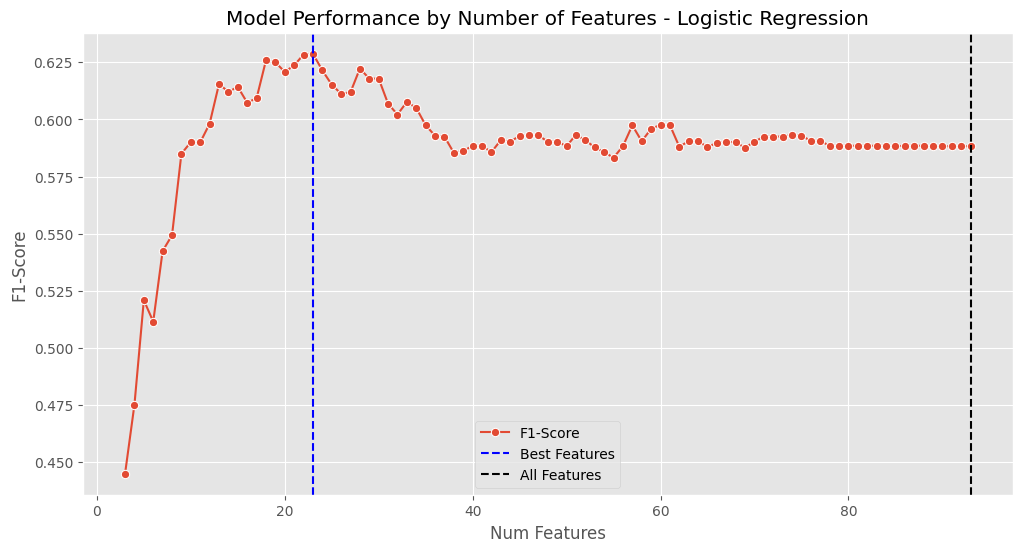


Evaluating SVM Linear...

Best Performance for SVM Linear with 24.0 Features:
Accuracy: 0.6253 | Precision: 0.6235
Recall: 0.6253 | F1-Score: 0.6182


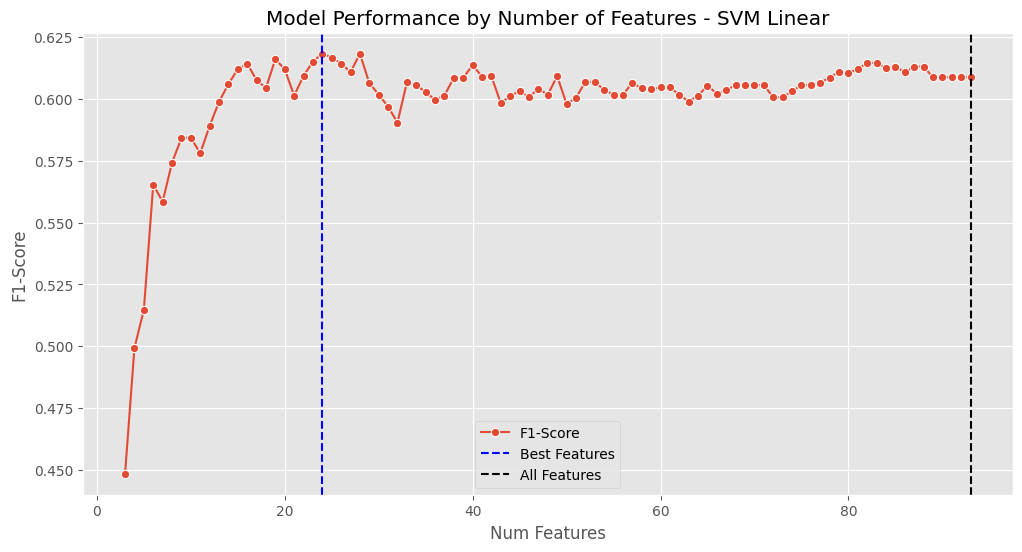


Evaluating Decision Tree...

Best Performance for Decision Tree with 14.0 Features:
Accuracy: 0.5232 | Precision: 0.5395
Recall: 0.5232 | F1-Score: 0.5252


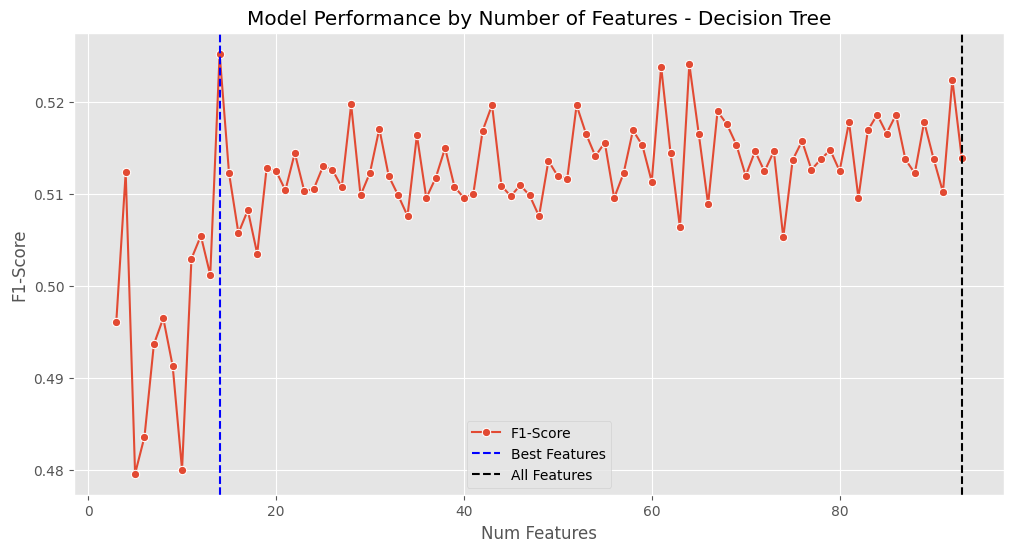


Evaluating Random Forest...

Best Performance for Random Forest with 54.0 Features:
Accuracy: 0.5936 | Precision: 0.5929
Recall: 0.5936 | F1-Score: 0.5897


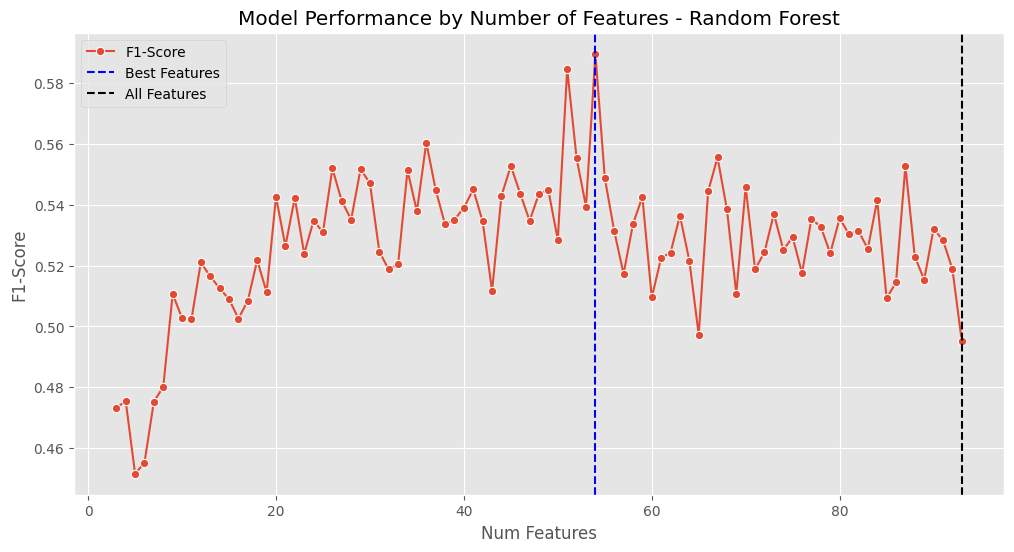


Evaluating XGBoost...

Best Performance for XGBoost with 56.0 Features:
Accuracy: 0.5670 | Precision: 0.5651
Recall: 0.5670 | F1-Score: 0.5642


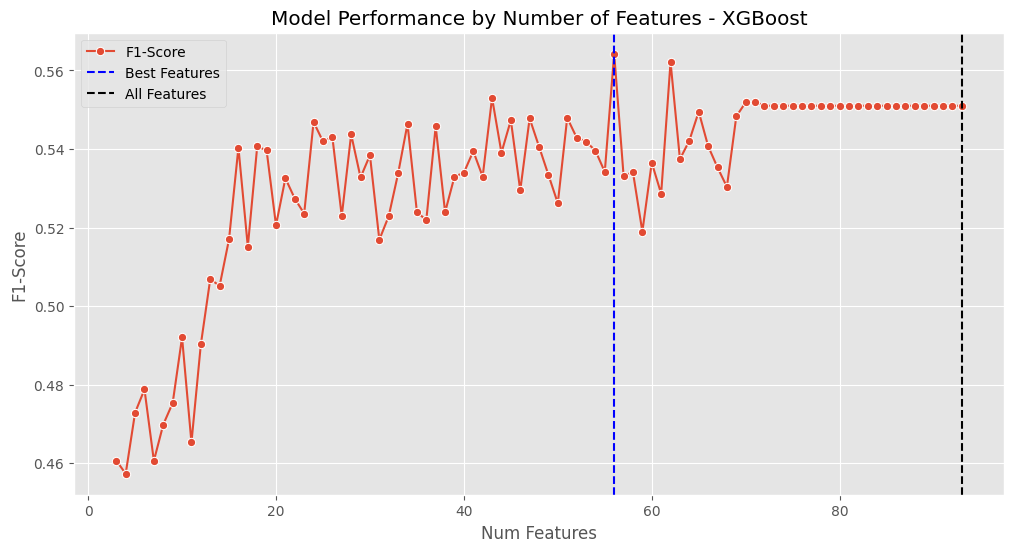


Evaluating Voting Ensemble...

Best Performance for Voting Ensemble with 60.0 Features:
Accuracy: 0.6083 | Precision: 0.6089
Recall: 0.6083 | F1-Score: 0.6056


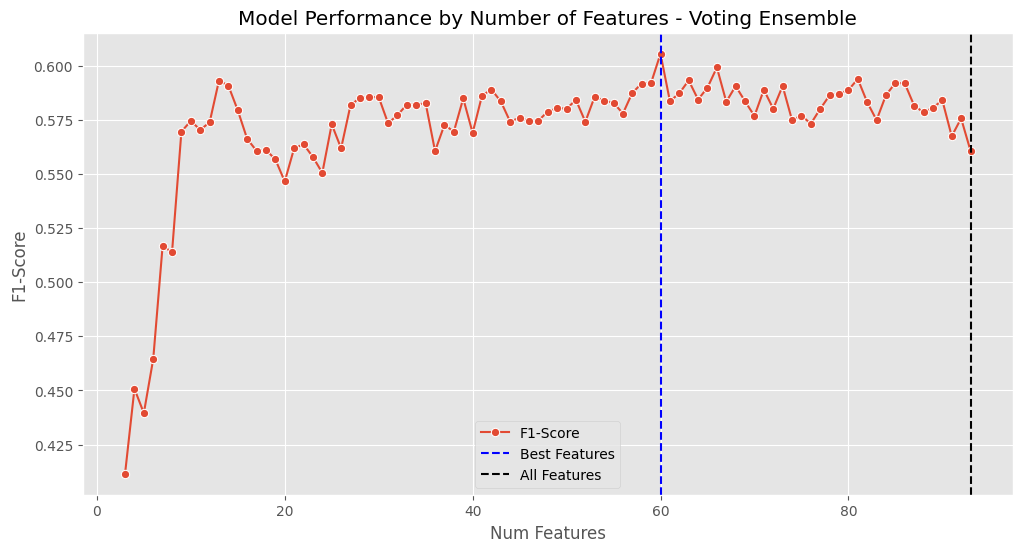

In [29]:
clf_lr = LogisticRegression(max_iter=1000)
clf_svm = SVC(kernel='linear', probability=True, decision_function_shape='ovr')
clf_dt = DecisionTreeClassifier(max_depth=5, random_state=101)
clf_rf = RandomForestClassifier(n_estimators=100, random_state=101)
clf_xgb = XGBClassifier(eval_metric='logloss')

models = {
    "Logistic Regression": clf_lr,
    "SVM Linear": clf_svm,
    "Decision Tree": clf_dt,
    "Random Forest": clf_rf,
    "XGBoost": clf_xgb,
    "Voting Ensemble": VotingClassifier(
        estimators=[
            ('lr', clf_lr),
            ('svm', clf_svm),
            ('dt', clf_dt),
            ('rf', clf_rf),
            ('xgb', clf_xgb)
        ],
        voting='soft'
    )
}

def get_feature_importance(model, X_train, y_train):
    """
    Compute feature importance for multi-class models.
    If the model is a VotingClassifier, use the first base estimator's feature importance.
    """
    # Clone the model to avoid modifying the original estimator
    model_clone = clone(model)
    
    # Handle VotingClassifier by using its first base estimator after fitting
    if isinstance(model_clone, VotingClassifier):
        model_clone.fit(X_train, y_train)
        base_model = model_clone.estimators_[0]  # Get the first fitted estimator from the VotingClassifier
        if hasattr(base_model, "coef_"):
            importance = np.mean(np.abs(base_model.coef_), axis=0)
        elif hasattr(base_model, "feature_importances_"):
            importance = base_model.feature_importances_
        else:
            raise ValueError("Base model does not support feature importance")
    else:
        # For other models, fit the cloned model and compute importance
        model_clone.fit(X_train, y_train)
        if isinstance(model_clone, (LogisticRegression, SVC)):
            if isinstance(model_clone, SVC) and model_clone.kernel != 'linear':
                raise ValueError("SVM with non-linear kernel does not support coef_")
            importance = np.mean(np.abs(model_clone.coef_), axis=0)
        elif isinstance(model_clone, (DecisionTreeClassifier, RandomForestClassifier, XGBClassifier)):
            importance = model_clone.feature_importances_
        else:
            raise ValueError(f"Feature importance not available for {model_clone.__class__.__name__}")
    
    sorted_idx = np.argsort(importance)[::-1]
    sorted_features = X_train.columns[sorted_idx]
    return sorted_features

def evaluate_model(model_name, model, X, y):
    """Evaluate model performance with incremental feature selection."""
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=101)
    results = []
    fold_feature_rankings = []

    # Precompute feature rankings for each fold using the appropriate method.
    for train_idx, _ in skf.split(X, y):
        X_train_fold = X.iloc[train_idx]
        y_train_fold = y.iloc[train_idx]
        try:
            sorted_features = get_feature_importance(model, X_train_fold, y_train_fold)
        except ValueError as e:
            print(f"Skipping {model_name}: {str(e)}")
            return
        fold_feature_rankings.append(sorted_features)
    
    max_features = X.shape[1]  # All features

    # Incrementally evaluate performance using 3 up to max_features.
    for num_features in range(3, max_features + 1):
        fold_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}
        for fold_idx, (train_idx, test_idx) in enumerate(skf.split(X, y)):
            sorted_features = fold_feature_rankings[fold_idx]
            selected_features = sorted_features[:num_features]
            X_train = X.iloc[train_idx][selected_features]
            y_train = y.iloc[train_idx]
            X_test = X.iloc[test_idx][selected_features]
            y_test = y.iloc[test_idx]

            # Clone the model for each fold to ensure a fresh fit
            model_clone = clone(model)
            model_clone.fit(X_train, y_train)
            y_pred = model_clone.predict(X_test)

            fold_metrics['accuracy'].append(accuracy_score(y_test, y_pred))
            fold_metrics['precision'].append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
            fold_metrics['recall'].append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
            fold_metrics['f1'].append(f1_score(y_test, y_pred, average='weighted', zero_division=0))

        results.append({
            'Num Features': num_features,
            'Accuracy': np.mean(fold_metrics['accuracy']),
            'Precision': np.mean(fold_metrics['precision']),
            'Recall': np.mean(fold_metrics['recall']),
            'F1-Score': np.mean(fold_metrics['f1']),
        })

    if not results:
        return

    df_results = pd.DataFrame(results)
    best_idx = df_results['F1-Score'].idxmax()
    best_result = df_results.loc[best_idx]

    print(f"\nBest Performance for {model_name} with {best_result['Num Features']} Features:")
    print(f"Accuracy: {best_result['Accuracy']:.4f} | Precision: {best_result['Precision']:.4f}")
    print(f"Recall: {best_result['Recall']:.4f} | F1-Score: {best_result['F1-Score']:.4f}")

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_results, x='Num Features', y='F1-Score', label='F1-Score', marker='o')
    plt.axvline(x=best_result['Num Features'], color='blue', linestyle='--', label='Best Features')
    plt.axvline(x=X.shape[1], color='black', linestyle='--', label='All Features')
    plt.title(f'Model Performance by Number of Features - {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    evaluate_model(model_name, model, X, y)